In [1]:
suppressMessages(library(ggplot2))
suppressMessages(library(cowplot))
suppressMessages(library(patchwork))
suppressMessages(library(dplyr))

In [2]:
df <- read.csv("../../results/10_stereo_seq/13_neighbor_enrichment/enrichment.csv", row.names = 1)
df$condition <- ifelse(df$sample == "HC01", "Healthy", "SSc")

In [10]:
df <- subset(df, n_neighbors > 100)

In [11]:
head(df)

,sample,n_neighbors,obs_proportion,exp_proportion,source_cell_type,target_cell_type,obs_exp,condition
,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
10,HC01,105,0.004570044,0.004443642,Fibroblasts,Macrophages,1.028446,Healthy
11,HC01,115,0.004546360,0.004413088,Fibroblasts,Macrophages,1.030199,Healthy
12,HC01,125,0.004517617,0.004393743,Fibroblasts,Macrophages,1.028193,Healthy
13,HC01,135,0.004515370,0.004365560,Fibroblasts,Macrophages,1.034316,Healthy
14,HC01,145,0.004507985,0.004329278,Fibroblasts,Macrophages,1.041279,Healthy
15,HC01,155,0.004495436,0.004329278,Fibroblasts,Macrophages,1.038380,Healthy


In [12]:
p <- ggplot(data = df, aes(x = n_neighbors, y = obs_exp)) +
    geom_line(aes(color = sample))

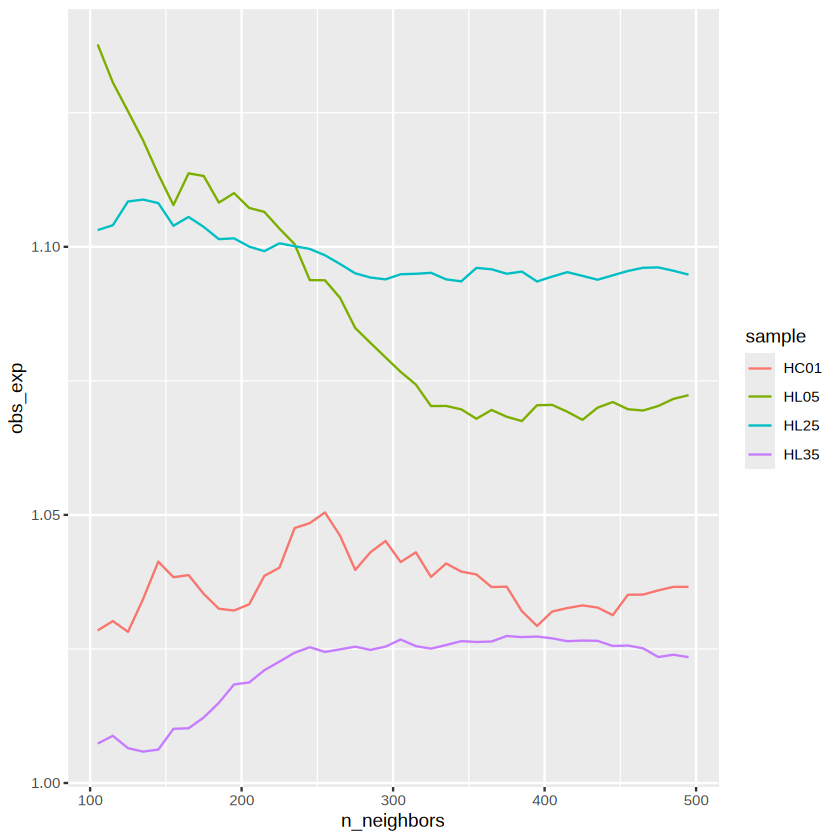

In [13]:
p

In [14]:
df1 <- df %>%
    dplyr::group_by(condition, n_neighbors) %>%
    dplyr::summarise(mean_obs_exp = mean(obs_exp))

`summarise()` has grouped output by 'condition'. You can override using the
`.groups` argument.


In [15]:
p <- ggplot(data = df1, aes(x = n_neighbors, y = mean_obs_exp)) +
    geom_line(aes(color = condition))

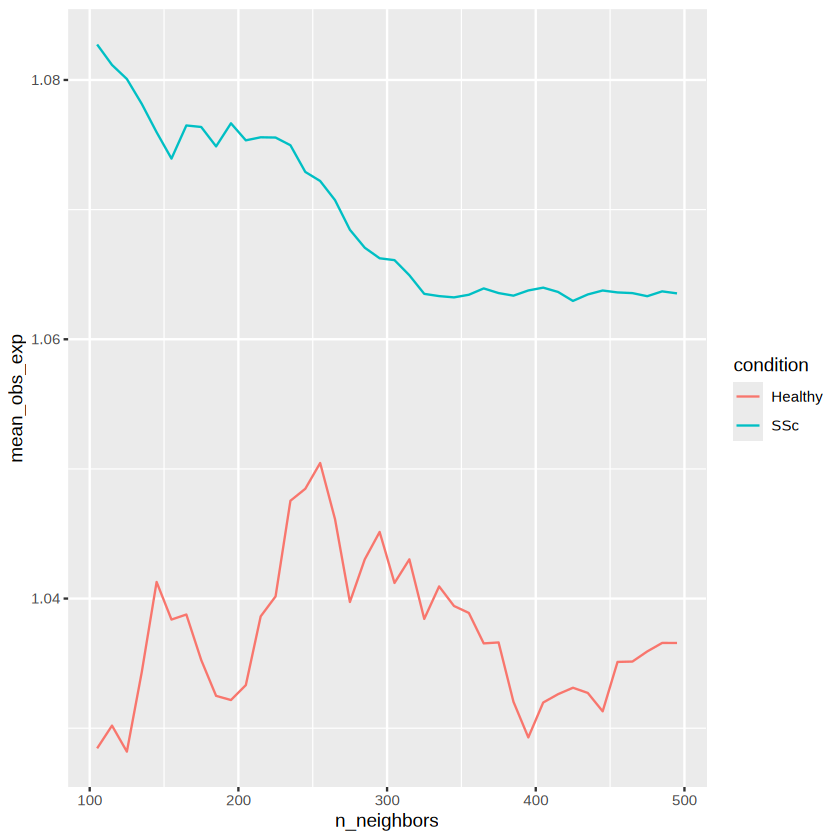

In [16]:
p